<a href="https://colab.research.google.com/github/yanii/aicompute/blob/main/ILSVRC_History_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on https://gist.github.com/germank/a542f22be0dad004b18775a7976d1a0b

---



#Install Requirements

In [1]:
!pip install altair_saver vega

In [2]:
!npm install --silent vega-lite vega-cli canvas

[canvas] Success: "/content/node_modules/canvas/build/Release/canvas.node" is installed via remote
+ canvas@2.7.0
+ vega-cli@5.20.2
+ vega-lite@5.0.0
updated 3 packages and audited 278 packages in 5.301s

7 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [3]:
!apt-get -qq install chromium-chromedriver

# Install Fonts

In [4]:
!wget -O /tmp/fonts.zip https://fonts.google.com/download?family=Roboto

--2021-04-05 02:12:25--  https://fonts.google.com/download?family=Roboto
Resolving fonts.google.com (fonts.google.com)... 173.194.215.100, 173.194.215.113, 173.194.215.102, ...
Connecting to fonts.google.com (fonts.google.com)|173.194.215.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/fonts.zip’

/tmp/fonts.zip          [ <=>                ]   1.07M  --.-KB/s    in 0.06s   

2021-04-05 02:12:26 (17.4 MB/s) - ‘/tmp/fonts.zip’ saved [1124235]



In [5]:
!unzip -fd /usr/share/fonts/truetype/ /tmp/fonts.zip

Archive:  /tmp/fonts.zip


Data

In [35]:
data = [{'name': '', 'type':'other', 'top5': 0.544, 'year': 2010},
        {'name': '', 'type':'other', 'top5': 0.701, 'year': 2010},
        {'name': '', 'type':'other', 'top5': 0.446, 'year': 2010},
        {'name': '', 'type':'other', 'top5': 0.787, 'year': 2010},
        {'name': '', 'type':'other', 'top5': 0.282, 'year': 2010},
        {'name': '', 'type':'other', 'top5': 0.742, 'year': 2010},
        {'name': '', 'type':'other', 'top5': 0.583, 'year': 2010},
        {'name': '', 'type':'other', 'top5': 0.751, 'year': 2010},
        {'name': '', 'type':'other', 'top5': 0.466, 'year': 2010},
        {'name': '', 'type':'other', 'top5': 0.336, 'year': 2010},
        {'name': '', 'type':'other', 'top5': 0.25770, 'year': 2011},
        {'name': '', 'type':'other', 'top5': 0.31010, 'year': 2011},
        {'name': '', 'type':'other', 'top5': 0.35960, 'year': 2011},
        {'name': '', 'type':'other', 'top5': 0.50450, 'year': 2011},
        {'name': 'AlexNet', 'type':'CNN', 'top5': 0.15315, 'year': 2012},
        {'name': '', 'type':'other', 'top5': 0.26172 , 'year': 2012},
        {'name': '', 'type':'other', 'top5': 0.26979, 'year': 2012},
        {'name': '', 'type':'other', 'top5': 0.27058, 'year': 2012},
        {'name': '', 'type':'other', 'top5': 0.29576, 'year': 2012},
        {'name': '', 'type':'other', 'top5': 0.33419, 'year': 2012},
        {'name': '', 'type':'other', 'top5': 0.34464, 'year': 2012},
        {'name': '', 'type':'CNN', 'top5': 0.11197, 'year': 2013},
        {'name': '', 'type':'CNN', 'top5': 0.12953, 'year': 2013},
        {'name': '', 'type':'CNN', 'top5': 0.13511, 'year': 2013},
        {'name': '', 'type':'CNN', 'top5': 0.13555, 'year': 2013},
        {'name': '', 'type':'CNN', 'top5': 0.13748, 'year': 2013},
        {'name': '', 'type':'CNN', 'top5': 0.13985, 'year': 2013},
        {'name': '', 'type':'CNN', 'top5': 0.14182, 'year': 2013},
        {'name': '', 'type':'CNN', 'top5': 0.14291, 'year': 2013},
        {'name': '', 'type':'CNN', 'top5': 0.15193, 'year': 2013},
        {'name': '', 'type':'CNN', 'top5': 0.15245, 'year': 2013},
        {'name': '', 'type':'CNN', 'top5': 0.06656, 'year': 2014},
        {'name': '', 'type':'CNN', 'top5': 0.07325, 'year': 2014},
        {'name': '', 'type':'CNN', 'top5': 0.0806, 'year': 2014},
        {'name': '', 'type':'CNN', 'top5': 0.08111, 'year': 2014},
        {'name': '', 'type':'CNN', 'top5': 0.09508, 'year': 2014},
        {'name': '', 'type':'CNN', 'top5': 0.09794, 'year': 2014},
        {'name': '', 'type':'CNN', 'top5': 0.10222, 'year': 2014},
        {'name': '', 'type':'CNN', 'top5': 0.11229, 'year': 2014},
        {'name': '', 'type':'CNN', 'top5': 0.11326, 'year': 2014},
        {'name': '', 'type':'CNN', 'top5': 0.12376, 'year': 2014},
        {'name': '', 'type':'CNN', 'top5': 0.03567, 'year': 2015},
        {'name': '', 'type':'CNN', 'top5': 0.03581, 'year': 2015},
        {'name': '', 'type':'CNN', 'top5': 0.04581, 'year': 2015},
        {'name': '', 'type':'CNN', 'top5': 0.04873, 'year': 2015},
        {'name': '', 'type':'CNN', 'top5': 0.05034, 'year': 2015},
        {'name': '', 'type':'CNN', 'top5': 0.05477, 'year': 2015},
        {'name': '', 'type':'CNN', 'top5': 0.05858, 'year': 2015},
        {'name': '', 'type':'CNN', 'top5': 0.06314, 'year': 2015},
        {'name': '', 'type':'CNN', 'top5': 0.06482, 'year': 2015},
        {'name': '', 'type':'CNN', 'top5': 0.06828, 'year': 2015},
        {'name': '', 'type':'CNN', 'top5': 0.02991, 'year': 2016},
        {'name': '', 'type':'CNN', 'top5': 0.03031, 'year': 2016},
        {'name': '', 'type':'CNN', 'top5': 0.03042, 'year': 2016},
        {'name': '', 'type':'CNN', 'top5': 0.03171, 'year': 2016},
        {'name': '', 'type':'CNN', 'top5': 0.03256, 'year': 2016},
        {'name': '', 'type':'CNN', 'top5': 0.03291, 'year': 2016},
        {'name': '', 'type':'CNN', 'top5': 0.03297, 'year': 2016},
        {'name': '', 'type':'CNN', 'top5': 0.03351, 'year': 2016},
        {'name': '', 'type':'CNN', 'top5': 0.03352, 'year': 2016},
        {'name': '', 'type':'CNN', 'top5': 0.03416, 'year': 2016},
]

In [36]:
import pandas as pd

In [37]:
dataframe = pd.DataFrame.from_dict(data)
dataframe['date'] = pd.to_datetime(dataframe['year'], format='%Y') 
dataframe = dataframe.sort_values(by=['date']) 

In [38]:
dataframe

,name,type,top5,year,date
0,,other,0.54400,2010,2010-01-01
1,,other,0.70100,2010,2010-01-01
2,,other,0.44600,2010,2010-01-01
3,,other,0.78700,2010,2010-01-01
4,,other,0.28200,2010,2010-01-01
...,...,...,...,...,...
55,,CNN,0.03256,2016,2016-01-01
56,,CNN,0.03291,2016,2016-01-01
57,,CNN,0.03297,2016,2016-01-01
58,,CNN,0.03351,2016,2016-01-01


# Seaborn Plot

In [39]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# fetch the name of font that was installed
path = '/usr/share/fonts/truetype/Roboto-Regular.ttf'
fontprop = fm.FontProperties(fname=path)

sns.set_theme()
# %matplotlib inline

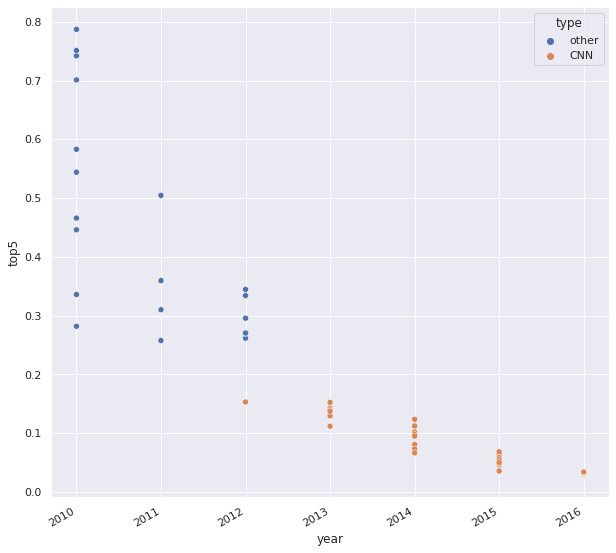

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))
# ax.set(yscale="log")
fig.autofmt_xdate()
# ax.plot_date(dataframe['date'], dataframe['pflops-days'])
splot = sns.scatterplot(data=dataframe, x='year', y='top5', hue='type')
# splot.set(yscale="log")

# Altair Plot

In [41]:
import altair as alt
from altair import datum

In [42]:
color_scheme='tableau10'

In [69]:
points=alt.Chart(dataframe, width=426, height=240).encode(
    alt.X('date:T', title='Year', scale=alt.Scale(domain=[pd.to_datetime('2009', format='%Y'), pd.to_datetime('2017', format='%Y')])),
    alt.Y('top5:Q', scale=alt.Scale(zero=False), title='Top-5 Validation Error'),
    alt.Color('type:N', scale=alt.Scale(scheme=color_scheme), legend=alt.Legend(orient='top-right', offset=5, fillColor='white', padding=5, strokeColor='grey', direction='horizontal', title=None, titleBaseline='middle'), title='DNN Architecture'),
    text='name:N'
).mark_circle(size=100)

annotations_other = points.transform_filter(
    datum.type == 'other'
).mark_text(
    align='left',
    baseline='middle',
    fontSize = 10,
    dx = 10,
)

annotations_cnn = points.transform_filter(
    datum.type == 'CNN'
).mark_text(
    align='left',
    baseline='middle',
    fontSize = 10,
    dx = 10,
)

chart = (points+annotations_cnn+annotations_other).configure_axis(
    gridColor='lightgrey',
    gridOpacity=0.33,
    labelFontStyle='Roboto-Regular',
    titleFontStyle='Roboto-Regular',
).configure_header(
    labelFontStyle='Roboto-Regular',
    titleFontStyle='Roboto-Regular',
)

chart.interactive()

alt.LayerChart(...)

In [70]:
#data_years=pd.DataFrame({'year': pd.to_datetime(dataframe['date'].dt.year.unique(), format='%Y')})
data_years=pd.DataFrame({'year': pd.to_datetime(range(2009, 2018), format='%Y'), 'label': ['',]*(len(range(2009,2018))-1)+ ['Human']})

In [74]:
points=alt.Chart(dataframe, width=426, height=240).encode(
    alt.X('date:T', title='Year', scale=alt.Scale(domain=[pd.to_datetime('2009', format='%Y'), pd.to_datetime('2017', format='%Y')])),
    alt.Y('top5:Q', scale=alt.Scale(zero=False), title='Top-5 Validation Error'),
    alt.Color('type:N', scale=alt.Scale(scheme=color_scheme), legend=alt.Legend(orient='top-right', offset=5, fillColor='white', padding=5, strokeColor='grey', direction='horizontal', title=None, titleBaseline='middle'), title='DNN Architecture'),
    text='name:N'
).mark_circle(size=100)

annotations_other = points.transform_filter(
    datum.type == 'other'
).mark_text(
    align='left',
    baseline='middle',
    fontSize = 10,
    dx = 10,
)

annotations_cnn = points.transform_filter(
    datum.type == 'CNN'
).mark_text(
    align='left',
    baseline='middle',
    fontSize = 10,
    dx = 10,
)
human = alt.Chart(data_years, width=426, height=240).transform_calculate(
    human='5.1/100',
).encode(
    x=alt.X('year:T', title='Year'),
    y=alt.Y('human:Q'),
).mark_line(size=2, color='gray', strokeDash=[5])

human_label = alt.Chart(data_years, width=426, height=240).transform_calculate(
    human='5.1/100',
).encode(
    x='max(year):T',
    y=alt.Y('human:Q'),
    text='label',
).mark_text(align='right', dx=-10, dy=-7, angle=0, color='gray',)

chart = (points+annotations_cnn+annotations_other+human+human_label).configure_axis(
    gridColor='lightgrey',
    gridOpacity=0.33,
    labelFontStyle='Roboto-Regular',
    titleFontStyle='Roboto-Regular',
).configure_header(
    labelFontStyle='Roboto-Regular',
    titleFontStyle='Roboto-Regular',
)

chart.interactive()

alt.LayerChart(...)

In [53]:
#alt.renderers.enable('altair_saver', ['vega-lite', 'png'])
from altair_saver import save
for fmt in ['json', 'vg.json', 'html', 'png', 'svg', 'pdf']:
  save(chart, f'chart.{fmt}')
!ls -lh chart.*

WARN text dropped as it is incompatible with "circle".


-rw-r--r-- 1 root root 9.7K Apr  5 02:25 chart.html
-rw-r--r-- 1 root root  15K Apr  5 02:25 chart.json
-rw-r--r-- 1 root root  19K Apr  5 02:25 chart.pdf
-rw-r--r-- 1 root root  22K Apr  5 02:25 chart.png
-rw-r--r-- 1 root root  32K Apr  5 02:25 chart.svg
-rw-r--r-- 1 root root  21K Apr  5 02:25 chart.vg.json


# Bokeh Plot

In [ ]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show, save
from bokeh.models import ColumnDataSource, Label, LabelSet, Plot
from bokeh.palettes import Spectral4 as colormap
from bokeh.transform import factor_cmap

# Call once to configure Bokeh to display plots inline in the notebook.
output_notebook()
BOKEH_RESOURCES='inline'

In [ ]:
source = ColumnDataSource(dataframe)

In [ ]:
#@title Default title text
p = figure(x_axis_type="datetime",
           x_axis_label='Year',
           y_axis_label='Top-5 Validation Error')
p.circle(x='date', y='top5', source=source, size=8,  legend_field='type',
         color=factor_cmap('type', palette=colormap,
                           factors=['CNN', 'other']))
labels = LabelSet(x='date', y='top5', text='name',
                  x_offset=5, y_offset=0, source=source, text_font_size='0.8em')
p.add_layout(labels)
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

p.output_backend = "svg"
show(p)